# Experiments with Violations/Non-violations or article 2,3, or/and 8 of the ECHR.
- *Art 2*: Right to Life
- *Art 3*: Freedom from torture and inhuman or degrading treatment
- *Art 8*: Right to Privacy

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import autoviz

In [3]:
violations_df = pd.read_csv('/content/drive/MyDrive/MacBook Air/dignity project/Data/violations_data.csv')

In [4]:
violations_df.head()

,Unnamed: 0,File,Name,Two,Three,Eight,Facts
0,0,001-168374.txt,TODO,False,True,False,born life vilnius around motorcycle collided c...
1,1,001-128036.txt,TODO,True,True,False,introduction lived worked farmer village kuşko...
2,2,001-156265.txt,TODO,False,False,True,detail concerning found annex background oliar...
3,3,001-145225.txt,TODO,False,True,False,born currently detained iaşi prison detained p...
4,4,001-174403.txt,TODO,False,True,False,born life šiauliai around friend arrived petro...


#### Some Numbers:
- *446* cases out of 1114 include a violation of either article 2,3,8
- *20* violations of Art 2
- *344* violations of Art 3
- *337* violations of Art 8

In [5]:
violations_df.shape

(446, 7)

In [6]:
violations_df['Two'].value_counts()

False    426
True      20
Name: Two, dtype: int64

In [7]:
violations_df['Three'].value_counts()

True     344
False    102
Name: Three, dtype: int64

In [8]:
violations_df['Eight'].value_counts()

False    337
True     109
Name: Eight, dtype: int64

In [9]:
sorted_df = violations_df.sort_values(['Two', 'Three', 'Eight'])

In [10]:
sorted_df

,Unnamed: 0,File,Name,Two,Three,Eight,Facts
2,2,001-156265.txt,TODO,False,False,True,detail concerning found annex background oliar...
30,30,001-205533.txt,TODO,False,False,True,life chelyabinsk region granted aid represente...
38,38,001-142398.txt,TODO,False,False,True,born life chişinău time thirtyfour year old ma...
43,43,001-157964.txt,TODO,False,False,True,born life baku azerbaijani national tatar orig...
50,50,001-211180.txt,TODO,False,False,True,life bratislava represented škubla partneri sr...
...,...,...,...,...,...,...,...
1,1,001-128036.txt,TODO,True,True,False,introduction lived worked farmer village kuşko...
51,51,001-216628.txt,TODO,True,True,False,respectively live ulyanovsk ulyanovsk region r...
143,143,001-201865.txt,TODO,True,True,False,born detained cahul time last observation made...
300,300,001-195527.txt,TODO,True,True,False,first second born prior magnitskiys arrest liv...


In [11]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 2.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(sorted_df, *['Two'], **{})
chart

# Creating other DataFrames

In [12]:
two_violation = violations_df[(violations_df['Two'] == True) & (violations_df['Three'] == False)& (violations_df['Eight'] == False)]
two_violation.head()

,Unnamed: 0,File,Name,Two,Three,Eight,Facts
24,24,001-168388.txt,TODO,True,False,False,born life baku daughter born married officer m...
41,41,001-139931.txt,TODO,True,False,False,born lived arrest village sushzavod novosibirs...
49,49,001-216360.txt,TODO,True,False,False,born life sofia two granddaughter born respect...
126,126,001-222311.txt,TODO,True,False,False,life morocco represented horvat practising zag...
141,141,001-150648.txt,TODO,True,False,False,thirtyseven romanian national rom origin live ...


In [13]:
two_violation.shape

(15, 7)

In [14]:
three_violation = violations_df[(violations_df['Two'] == False) & (violations_df['Three'] == True)& (violations_df['Eight'] == False)]
three_violation.head()

,Unnamed: 0,File,Name,Two,Three,Eight,Facts
0,0,001-168374.txt,TODO,False,True,False,born life vilnius around motorcycle collided c...
3,3,001-145225.txt,TODO,False,True,False,born currently detained iaşi prison detained p...
4,4,001-174403.txt,TODO,False,True,False,born life šiauliai around friend arrived petro...
5,5,001-220954.txt,TODO,False,True,False,second born third born represented gaşiţoi pra...
6,6,001-200448.txt,TODO,False,True,False,born currently detained dnipro condition pretr...


In [15]:
three_violation.shape

(317, 7)

In [16]:
eight_violation = violations_df[(violations_df['Two'] == False) & (violations_df['Three'] == False)& (violations_df['Eight'] == True)]
eight_violation.head()

,Unnamed: 0,File,Name,Two,Three,Eight,Facts
2,2,001-156265.txt,TODO,False,False,True,detail concerning found annex background oliar...
30,30,001-205533.txt,TODO,False,False,True,life chelyabinsk region granted aid represente...
38,38,001-142398.txt,TODO,False,False,True,born life chişinău time thirtyfour year old ma...
43,43,001-157964.txt,TODO,False,False,True,born life baku azerbaijani national tatar orig...
50,50,001-211180.txt,TODO,False,False,True,life bratislava represented škubla partneri sr...


In [17]:
eight_violation.shape

(87, 7)

# Topic Modelling for Each single article violation

### Imports for LDA topic modelling

In [18]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.56.

In [19]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from gensim.models import TfidfModel
import pyLDAvis
import pyLDAvis.gensim
import pandas as pd
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder, QuadgramAssocMeasures, QuadgramCollocationFinder
from nltk import word_tokenize
import matplotlib.pyplot as plt

In [20]:
nltk.download('words')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Organising

In [21]:
def organise(facts):
  facts_words = []
  for fact in facts:
    split_fact = fact.split()
    facts_words.append(split_fact)
  return facts_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic modelling of cases violating only article 8

In [22]:
# Splitting into a list of lists of words
facts = eight_violation['Facts'].tolist()
facts_words = organise(facts)
print(len(facts_words))

87


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
print(facts_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Creating Bigrams

In [24]:
def find_bigrams(facts):
  text = ' '.join(facts)
  tokens = word_tokenize(text)
  bigrams = list(nltk.bigrams(tokens))
  return bigrams

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
bigram_list = []
for data in facts_words:
  bigrams = find_bigrams(data)
  bigram_list.append(bigrams)

print(bigram_list[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('detail', 'concerning'), ('concerning', 'found'), ('found', 'annex'), ('annex', 'background'), ('background', 'oliari'), ('oliari', 'two'), ('two', 'committed'), ('committed', 'stable'), ('stable', 'relationship'), ('relationship', 'declared'), ('declared', 'intention'), ('intention', 'marry'), ('marry', 'requested'), ('requested', 'civil'), ('civil', 'status'), ('status', 'office'), ('office', 'trent'), ('trent', 'commune'), ('commune', 'issue'), ('issue', 'relevant'), ('relevant', 'marriage'), ('marriage', 'banns'), ('banns', 'request'), ('request', 'rejected'), ('rejected', 'two'), ('two', 'challenged'), ('challenged', 'trent'), ('trent', 'tribunal'), ('tribunal', 'accordance'), ('accordance', 'civil'), ('civil', 'code'), ('code', 'argued'), ('argued', 'italian'), ('italian', 'explicitly'), ('explicitly', 'prohibit'), ('prohibit', 'marriage'), ('marriage', 'sex'), ('sex', 'even'), ('even', 'position'), ('position', 'would'), ('would', 'unconstitutional'), ('unconstitutional', 'tre

In [26]:
# Because the NLTK bigrams are outputted as lists of tuples, this piece of code is to format the bigrams with the classic representation "word1_word2"
combined_tuples = []
final_bigram_list = []
for bigrams in bigram_list:
  combined_tuples = []
  for tuples in bigrams:
    combined = '_'.join(tuples)
    combined_tuples.append(combined)
  final_bigram_list.append(combined_tuples)
print(final_bigram_list[1])
final_data = final_bigram_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['life_chelyabinsk', 'chelyabinsk_region', 'region_granted', 'granted_aid', 'aid_represented', 'represented_markov', 'markov_admitted', 'admitted_practise', 'practise_ukraine', 'ukraine_represented', 'represented_initially', 'initially_matyushkin', 'matyushkin_representative', 'representative_russian', 'russian_federation', 'federation_successor', 'successor_office', 'office_galperin', 'galperin_submitted', 'submitted_party', 'party_summarised', 'summarised_newspaper', 'newspaper_material', 'material_time', 'time_head', 'head_local', 'local_inspectorate', 'inspectorate_juvenile', 'juvenile_affaire', 'affaire_arrested', 'arrested_suspicion', 'suspicion_sexual', 'sexual_assault', 'assault_minor', 'minor_local', 'local_newspaper', 'newspaper_published', 'published_major', 'major_shameful', 'shameful_passion', 'passion_officer', 'officer_abused', 'abused_underage', 'underage_offender', 'offender_accompanied', 'accompanied_photograph', 'photograph_andrey', 'andrey_parfentyev', 'parfentyev_h

### LDA and Coherence Score for optimality

In [27]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
def filter_tf_idf(id2word, texts, corpus, tfidf):

        # define a lower and upper bound
        low_value = 0.03
        high_value = 0.6
        words = []
        words_missing_in_tfidf = []
        for i in range(0, len(corpus)):
            bow = corpus[i]
            value_words = []
            tfidf_ids = [id for id, value in tfidf[bow]]
            bow_ids = [id for id, value in bow]
            value_words = [id for id, value in tfidf[bow] if value < low_value or value > high_value]
            drops = value_words + words_missing_in_tfidf

            for item in drops:
                words.append(id2word[item])
            words_missing_in_tfidf = [id for id in bow_ids if
                                      id not in tfidf_ids]

            new_bow = [b for b in bow if b[0] not in value_words and b[0] not in words_missing_in_tfidf]
            corpus[i] = new_bow

        return corpus, id2word

def perform_lda(corpus, id2word, topics, chunk):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics= topics,
                                                    random_state=100,
                                                    update_every=1,
                                                    chunksize= chunk,
                                                    passes=10,
                                                    alpha="auto")

        return lda_model

In [29]:
id2word = corpora.Dictionary(final_data)
texts = final_data
corpus = [id2word.doc2bow(text) for text in texts]
tfidf = TfidfModel(corpus, id2word=id2word)
corpus_filter, id2word_filter = filter_tf_idf(id2word, texts, corpus, tfidf)

In [30]:
# For the coherence score experiment
def coherence_score(corpus, id2word, final_data, limit, step, chunk):
  # for every model, keep track on coherence score
  coherence_values = []
  model_list = []
  for topics in range(2, limit, step):
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topics,
                                           random_state=100,
                                           chunksize=chunk,
                                           passes=10,
                                           alpha="auto")
    coherence_model_lda = CoherenceModel(model=lda_model, texts=final_data, dictionary=id2word, coherence='c_v')
    model_list.append(lda_model)
    coherence_values.append(coherence_model_lda.get_coherence())

  return model_list, coherence_values

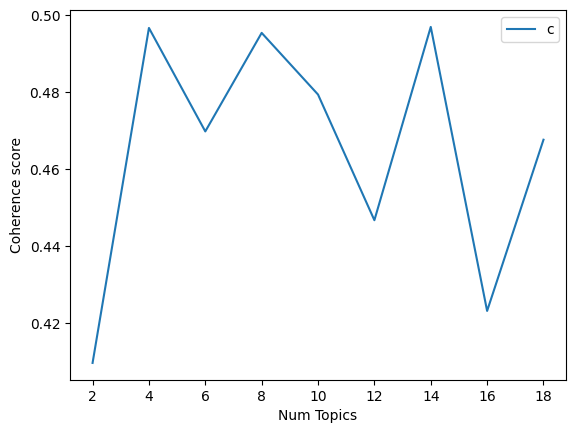

In [31]:
model_list, coherence_values = coherence_score(corpus_filter, id2word_filter, final_data, 20, 2, len(facts_words)//2)
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [32]:
lda_model = perform_lda(corpus_filter, id2word_filter, 4, len(facts_words)//2)
coherence_model = CoherenceModel(model=lda_model, texts=final_data, dictionary=id2word_filter, coherence='c_v')
print(coherence_model.get_coherence())

0.4966385569902335


### Visualising Results

In [33]:
# Dataframe with first 5 words of each topic
def show_table(n_topics):
  topics_df = pd.DataFrame(columns=['Topic', 'Top 5 Terms', 'Prob'])
  results = lda_model.show_topics(num_topics=n_topics, num_words=5, log=False, formatted=False)

  for i in range(0, n_topics):
      terms_five = []
      prob_five = []
      for j in range(0, 5):
          terms_five.append(results[i][1][j][0])
          prob_five.append(results[i][1][j][1])

      new_row = pd.DataFrame({'Topic': [i], 'Top 5 Terms': [terms_five], 'Prob': [prob_five]})
      topics_df = pd.concat([topics_df, new_row], ignore_index=True)

  return topics_df

In [34]:
topics_df = show_table(4)
topics_df

,Topic,Top 5 Terms,Prob
0,0,"[parental_authority, best_interest, child_welf...","[0.001075393, 0.00076712173, 0.00069180754, 0...."
1,1,"[best_interest, child_welfare, domestic_violen...","[0.0012664074, 0.0012135619, 0.0007822225, 0.0..."
2,2,"[von_hannover, pecuniary_damage, university_pr...","[0.004065963, 0.003954237, 0.003264982, 0.0032..."
3,3,"[venice_commission, civil_service, baku_city, ...","[0.00059753377, 0.0005593727, 0.00050118193, 0..."


In [35]:
!pip install "pandas<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus_filter, id2word_filter, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.042056  0.003839       1        1  30.018921
3      0.000242  0.027161       2        1  26.126491
2      0.054142 -0.011954       3        1  23.929312
0     -0.012328 -0.019046       4        1  19.925276, topic_info=                        Term       Freq      Total Category  logprob  loglift
10582           von_hannover  39.000000  39.000000  Default  30.0000  30.0000
14396       pecuniary_damage  38.000000  38.000000  Default  29.0000  29.0000
37071   university_professor  32.000000  32.000000  Default  28.0000  28.0000
199957      craiova_district  32.000000  32.000000  Default  27.0000  27.0000
13480       general_interest  26.000000  26.000000  Default  26.0000  26.0000
...                      ...        ...        ...      ...      ...      ...
48682      biological_parent   2.344505   3.845217   Topic4  -8.1518   1.1184
28388           strip_search   2.256891   3.372862   Topic4  -8.1899   1.2114
88952        welfare_service   2.500602   9.504207   Topic4  -8.0874   0.2780
49657          lobben_others   2.298820   5.276485   Topic4  -8.1715   0.7823
50313          strand_lobben   2.295522   5.832285   Topic4  -8.1729   0.6807

[199 rows x 6 columns], token_table=        Topic      Freq                Term
term                                       
151548      1  0.977728  abolition_nobility
83042       3  0.970093          acted_good
87200       1  0.308997      adoption_child
87200       4  0.617994      adoption_child
172705      4  0.833902      agelimit_woman
...       ...       ...                 ...
50525       1  0.782518       welfare_board
50525       4  0.173893       welfare_board
88952       1  0.736516     welfare_service
88952       4  0.315650     welfare_service
174731      4  0.948471          woman_year

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [38]:
topics_df.to_csv('/content/drive/MyDrive/MacBook Air/dignity project/Experiments/topics_eight_violation.csv', index=False)

# CLUSTERING EACH VIOLATION

In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [48]:
def tf_idf_vectorizer(facts_df):
    # Vectorise
    vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
    # Matrix of vectors that will be used to train KMeans
    matrix = vectorizer.fit_transform(facts_df['Facts'])

    return vectorizer, matrix

def remove_lang_words(facts_words, english_words):
    # Filtering out non-english words and three-letter words
    filtered = [word for word in facts_words if word in english_words and len(word) > 3]
    return filtered

In [49]:
new_facts = pd.DataFrame(columns=['Facts'])
english_words = set(nltk.corpus.words.words())

In [51]:
for fact in eight_violation['Facts']:
    fact_words = fact.split()
    facts_words_filtered = remove_lang_words(fact_words, english_words)
    new_fact = ' '.join(facts_words_filtered)
    new_row = pd.DataFrame({'Facts': [new_fact]})
    new_facts = pd.concat([new_facts, new_row], ignore_index=True)


In [52]:
vectorizer, tfidf_clust_mat = tf_idf_vectorizer(new_facts)
svd = TruncatedSVD(n_components=len(facts_words)//2, random_state=42)
X_svd = svd.fit_transform(tfidf_clust_mat)

In [53]:
pca = PCA(2)
violations_clust = pca.fit_transform(tfidf_clust_mat.toarray())

In [61]:
kmeans = KMeans(3)
labels = kmeans.fit_predict(violations_clust)
clusters = kmeans.labels_
unique_labels = np.unique(labels)

In [62]:
# getting the top keywords
top_words = pd.DataFrame(tfidf_clust_mat.todense()).groupby(clusters).mean()
terms = vectorizer.get_feature_names_out()
for i, r in top_words.iterrows():
  print('\nCluster {}'.format(i))
  print(','.join([terms[t] for t in np.argsort(r)[-10:]]))


Cluster 0
condition,code,individual,rate,treatment,provided,medical,procedure,constitutional,measure

Cluster 1
civil,press,photograph,debate,medium,statement,reputation,publication,newspaper,journalist

Cluster 2
best,strand,board,parental,contact,care,parent,child,welfare,foster


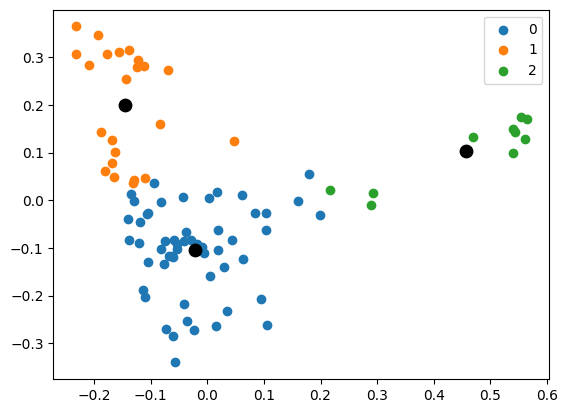

In [63]:
centroids = kmeans.cluster_centers_
for i in unique_labels:
    plt.scatter(violations_clust[labels == i][:,0], violations_clust[labels == i][:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()